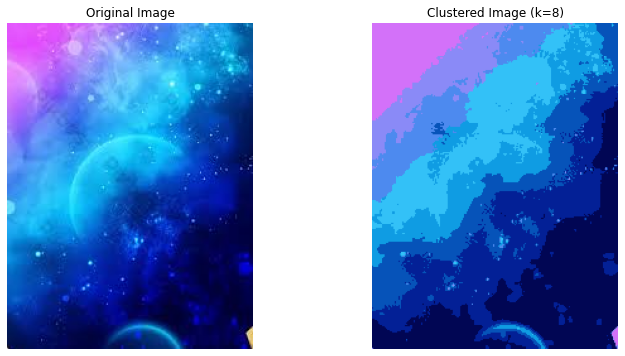

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('star.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image_rgb.reshape((-1, 3))
k = 8
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(np.float32(pixels), k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_rgb.shape)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(segmented_image)
ax[1].set_title(f"Clustered Image (k={k})")
ax[1].axis('off')
plt.show()

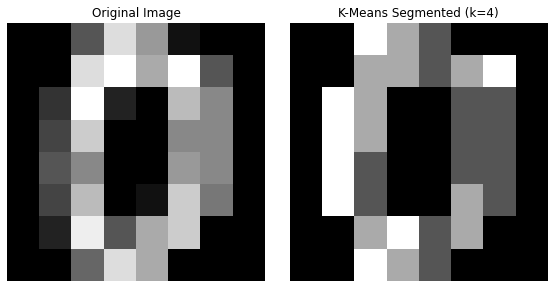

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

digits = load_digits()
images = digits.images
image = images[0]

flat_image = image.reshape(-1, 1)

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(flat_image)
clustered = kmeans.labels_

segmented_image = clustered.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(segmented_image, cmap='gray')
ax[1].set_title(f"K-Means Segmented (k={n_clusters})")
ax[1].axis('off')

plt.tight_layout()
plt.show()
